In [1]:
# Source: https://towardsdatascience.com/deep-guide-into-styling-plots-delivering-effective-visuals-12e40107b380
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# No need to include %matplotlib inline magic command. These things come built-in now.

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
nobel = pd.read_csv('archive.csv', parse_dates=['Birth Date'])

In [6]:
list(nobel.columns)

['Year',
 'Category',
 'Prize',
 'Motivation',
 'Prize Share',
 'Laureate ID',
 'Laureate Type',
 'Full Name',
 'Birth Date',
 'Birth City',
 'Birth Country',
 'Sex',
 'Organization Name',
 'Organization City',
 'Organization Country',
 'Death Date',
 'Death City',
 'Death Country']

In [7]:
# Drop unnecessary columns
nobel.drop([
    'Organization Name', 'Organization City', 'Organization Country',
    'Motivation', 'Death Date', 'Death Country', 'Death City'
], inplace=True, axis='columns')

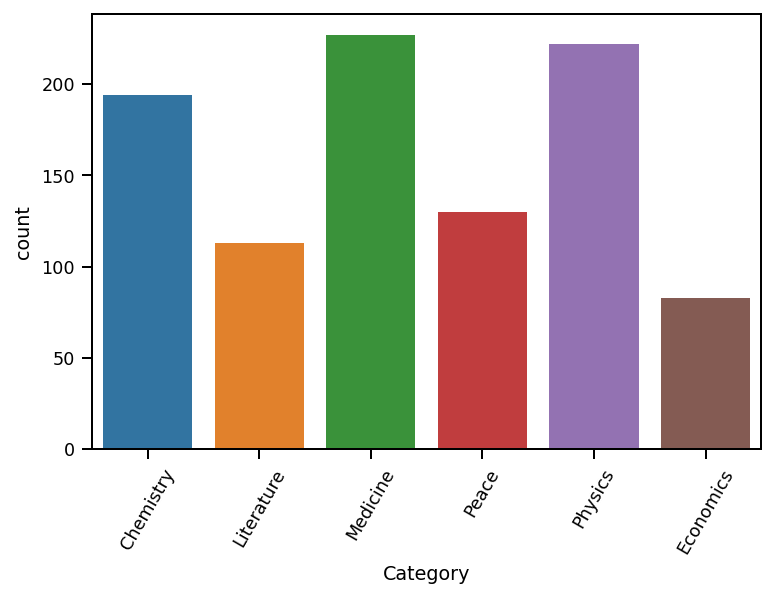

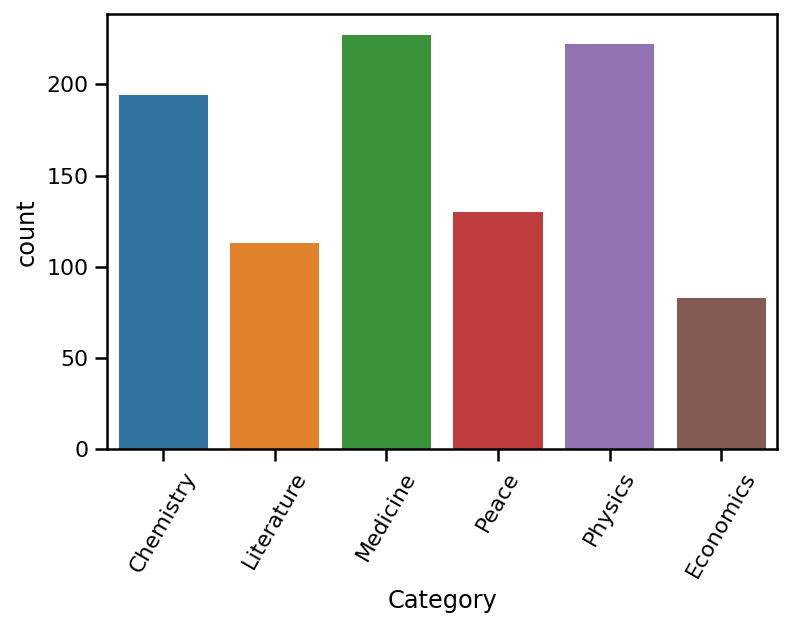

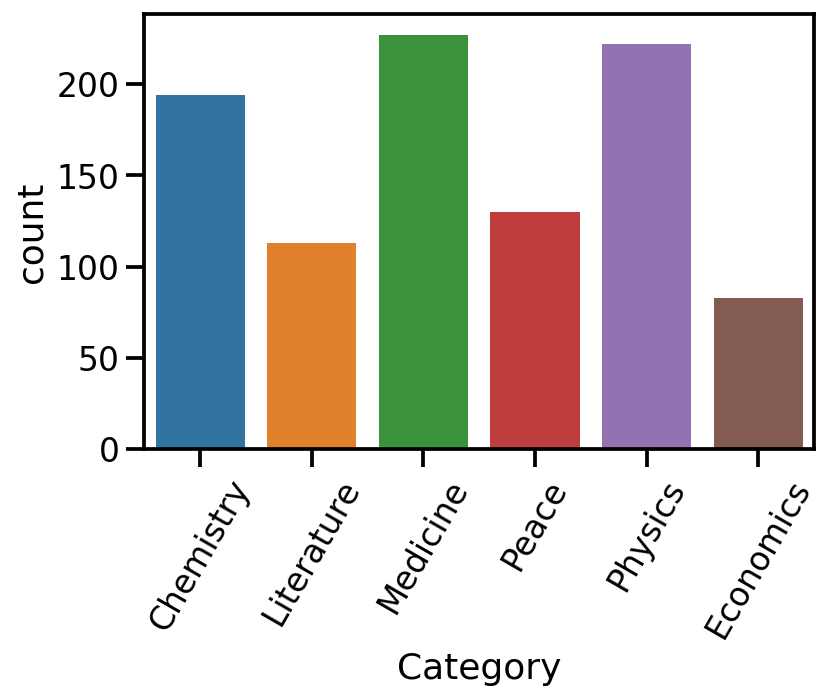

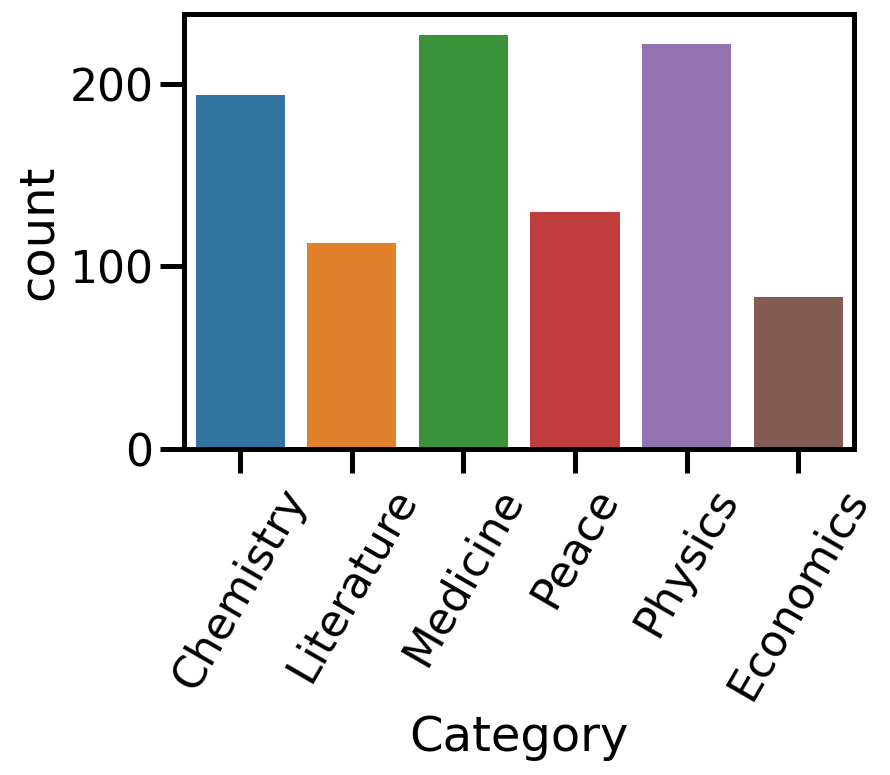

In [8]:
contexts = ['paper', 'notebook', 'talk', 'poster']

# Create a function to set context
def example_context(context):
    with sns.plotting_context(context):
        sns.countplot(nobel['Category'])
        plt.xticks(rotation=60)
        plt.show();

# Loop over contexts
for context in contexts:
    example_context(context);

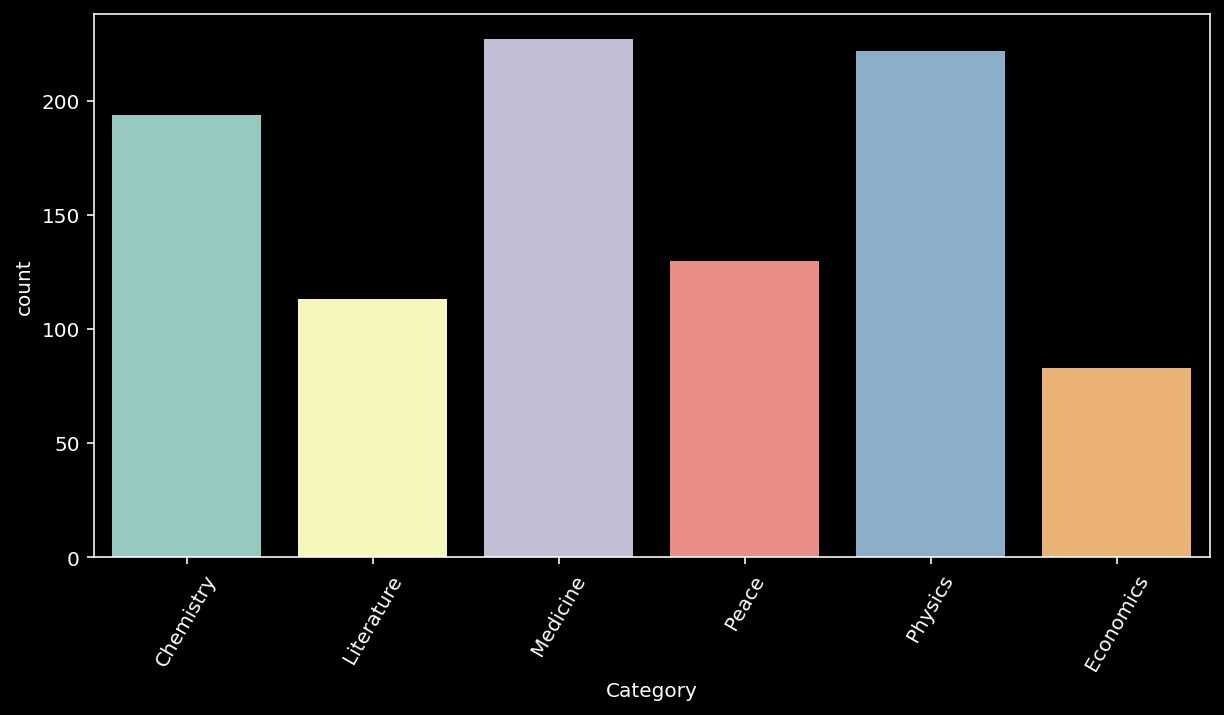

In [9]:
# Set the style
plt.style.use('dark_background')
#sns.set_context('notebook')
#sns.set_style('darkgrid')
# Plot a countplot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(nobel['Category'])
plt.xticks(rotation=60)
plt.show();

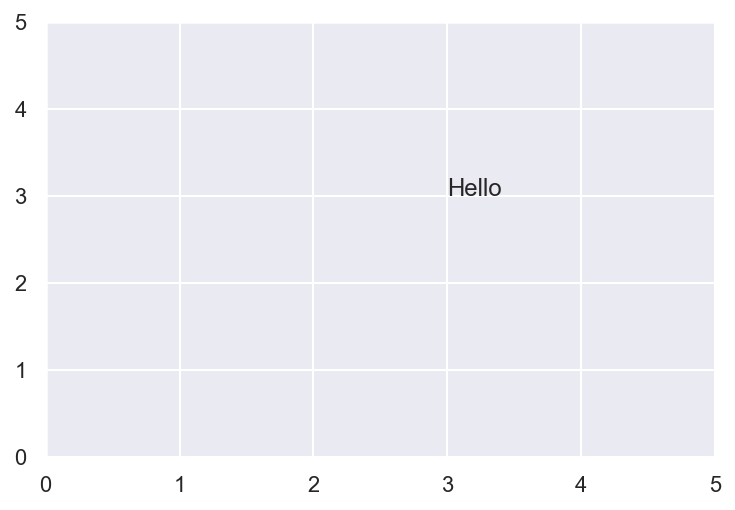

In [10]:
sns.set_style('darkgrid')
sns.set_context('notebook')
fig, ax = plt.subplots()
ax.set(xlim=(0, 5), ylim=(0, 5))
ax.annotate('Hello', xy=(3, 3), xycoords='data')
plt.show();

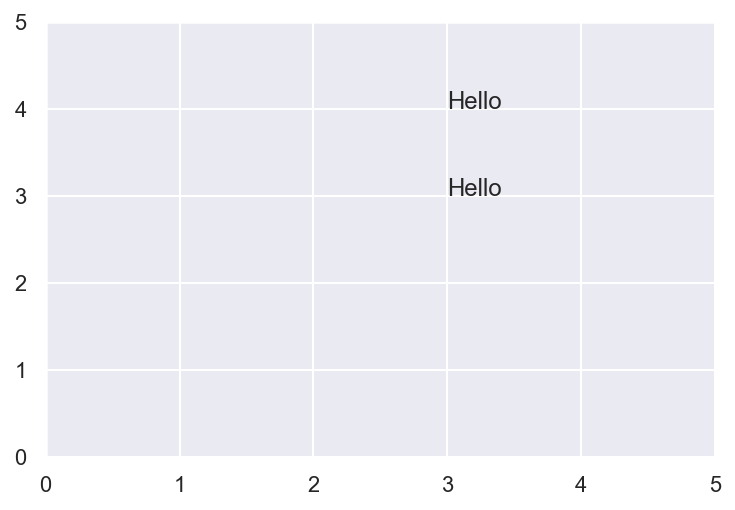

In [11]:
fig, ax = plt.subplots()
ax.set(xlim=(0, 5), ylim=(0, 5))
ax.annotate('Hello', xy=(3, 3), xycoords='data')
# Place a text one point above
ax.annotate('Hello', xy=(3, 4), xycoords='data')
plt.show();

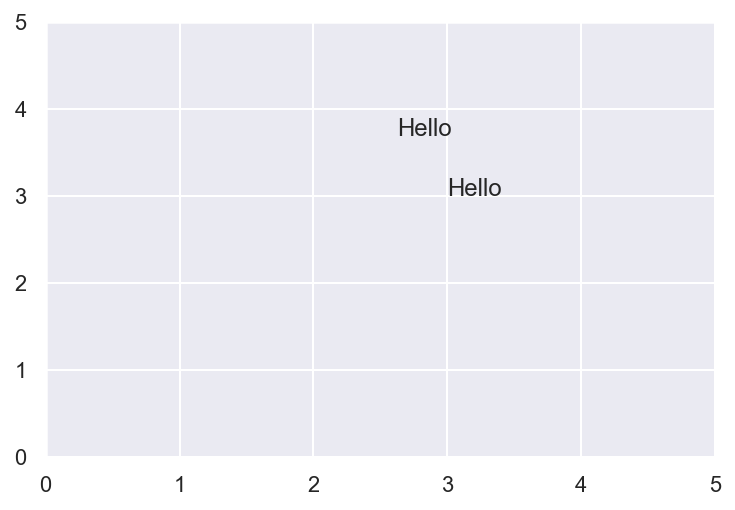

In [12]:
fig, ax = plt.subplots()
ax.set(xlim=(0, 5), ylim=(0, 5))
ax.annotate('Hello',           # Text to be placed
            xy=(3, 3),         # Reference point
            xycoords='data',   # Type of coordinate
            xytext=(-25, 30),  # How many points off from the reference point
            textcoords='offset points')   # Use offset points
ax.annotate('Hello', xy=(3, 3), xycoords='data')
plt.show();

In [13]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


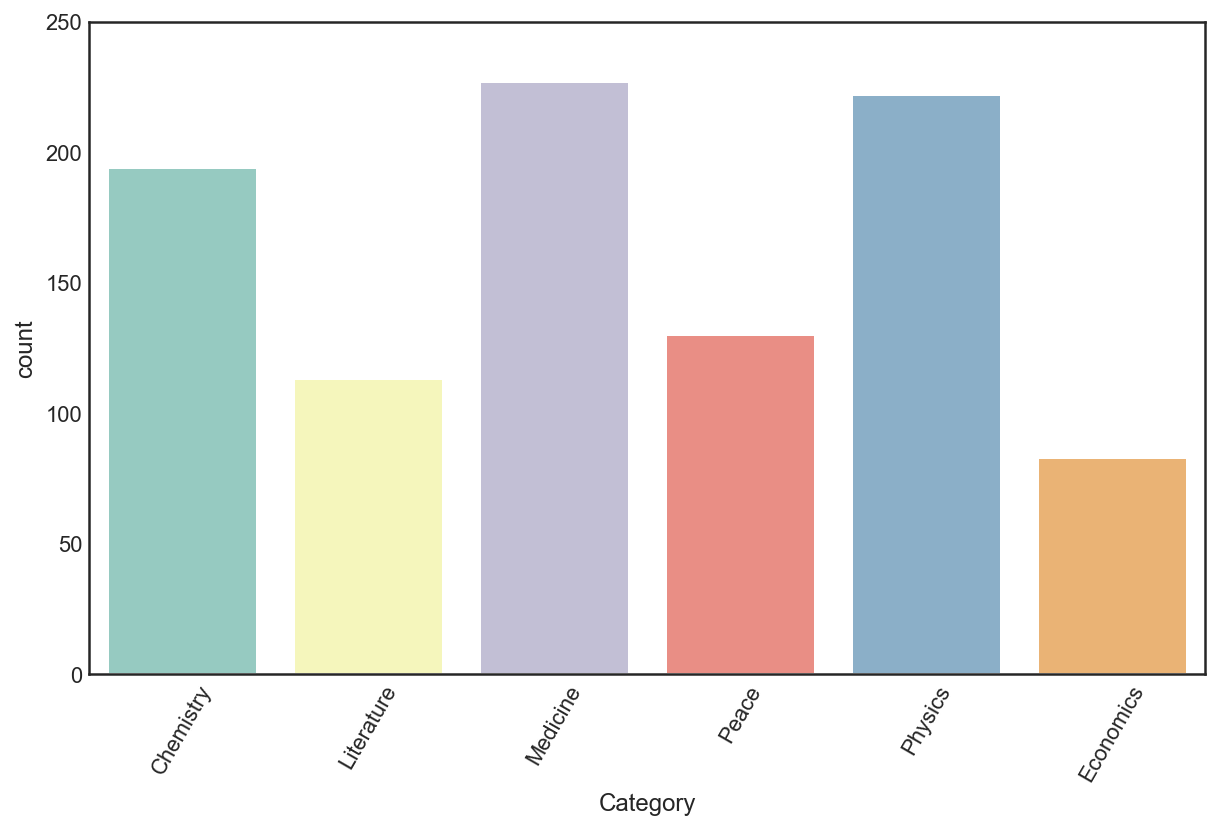

In [14]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(10, 6))
# Store the countplot to a variable
plot = sns.countplot(nobel['Category'], ax=ax)
ax.set(ylim=(0, 250))
plt.xticks(rotation=60)
plt.show(plot);

In [15]:
print(plot)
print(type(plot))

AxesSubplot(0.125,0.125;0.775x0.755)
<class 'matplotlib.axes._subplots.AxesSubplot'>


In [16]:
for patch in plot.patches:
    print(
        f"Height: {patch.get_height()}, x_coordinate:{patch.get_x()}, width: {patch.get_width()}"
    )

Height: 194, x_coordinate:-0.4, width: 0.8
Height: 113, x_coordinate:0.6, width: 0.8
Height: 227, x_coordinate:1.6, width: 0.8
Height: 130, x_coordinate:2.6, width: 0.8
Height: 222, x_coordinate:3.6, width: 0.8
Height: 83, x_coordinate:4.6, width: 0.8


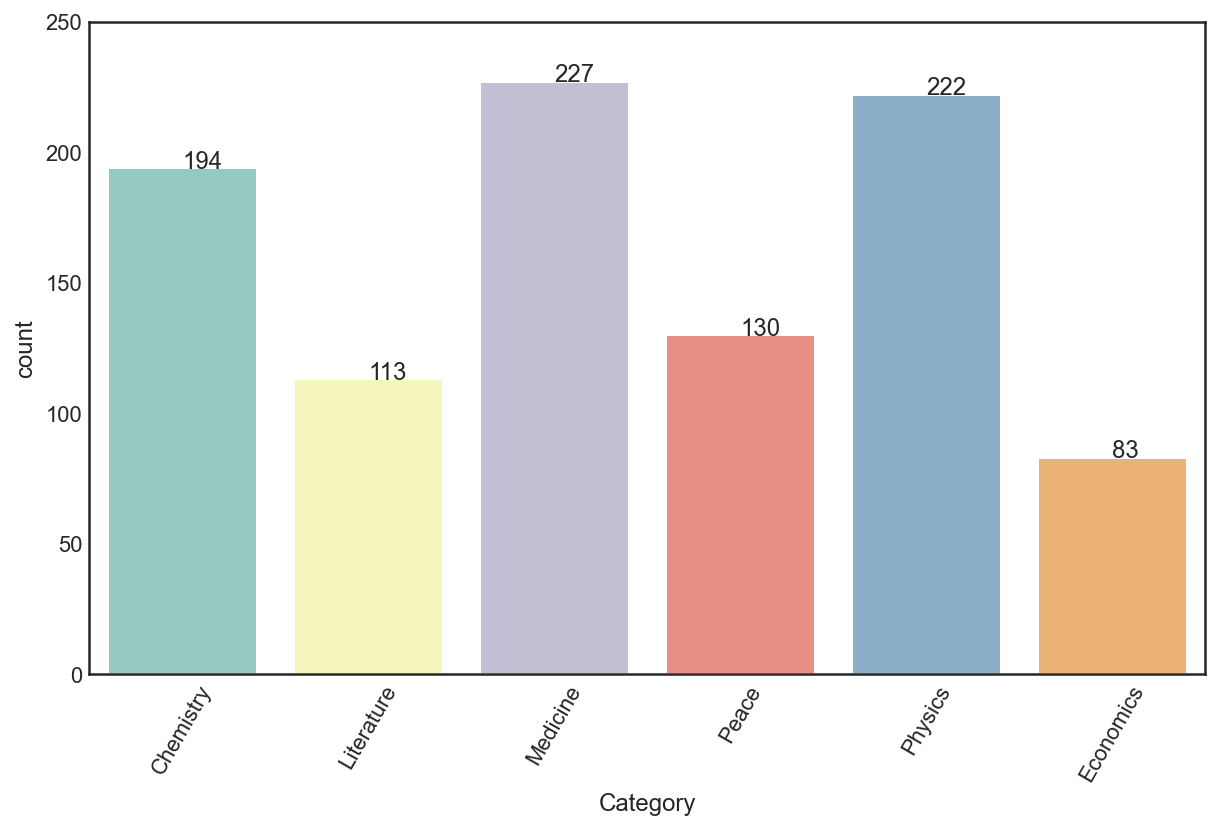

In [25]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6));
# Store the plot for further tasks
plot = sns.countplot(nobel['Category'], ax=ax);
# Make room for annotations by increasing the height of the plot
ax.set(ylim=(0, 250));
# Loop over rectangles
for patch in plot.patches:
    # Place texts
    ax.annotate(s=patch.get_height(),
                xy=(patch.get_x() + patch.get_width() / 2,
                    patch.get_height()));

plt.xticks(rotation=60);
#plt.show(plot)

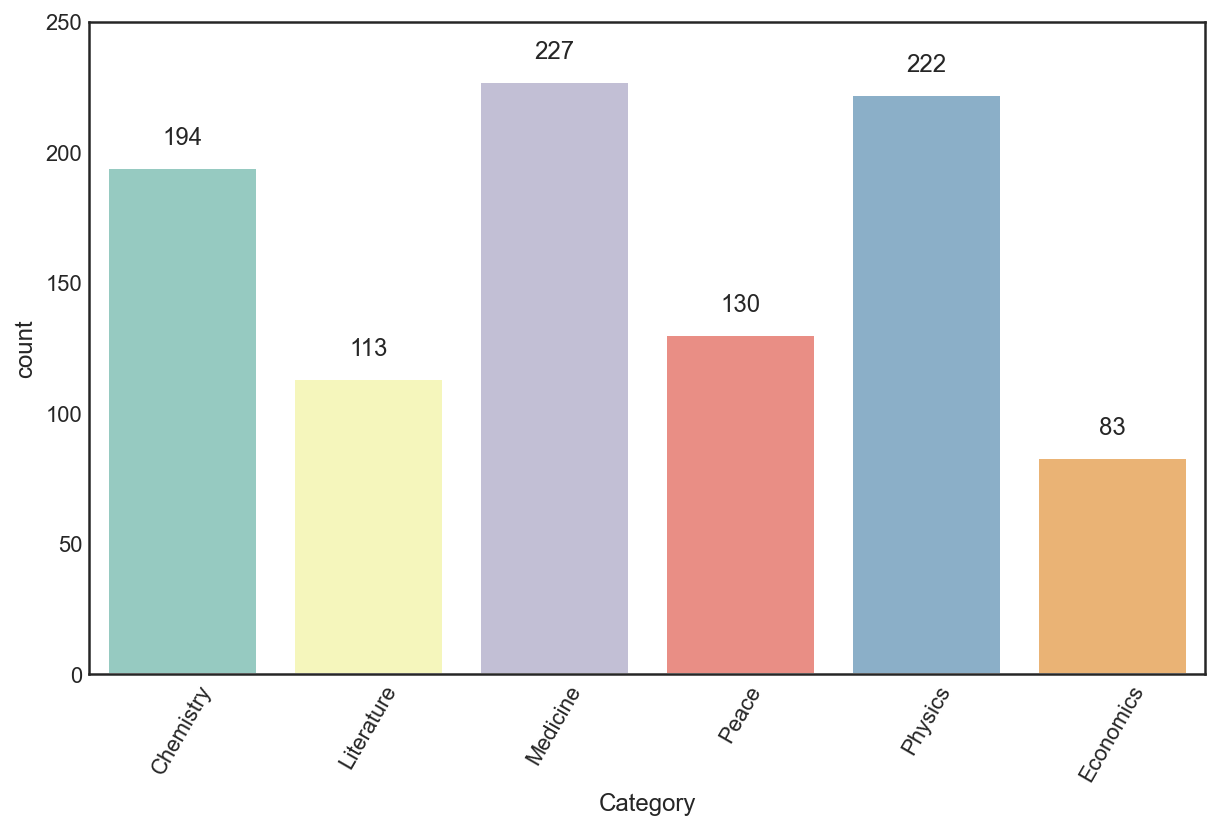

In [24]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6));
# Store the plot for further tasks
plot = sns.countplot(nobel['Category'], ax=ax);
# Make room for annotations by increasing the height of the plot
ax.set(ylim=(0, 250));
# Loop over rectangles
for patch in plot.patches:
    # Place texts
    ax.annotate(s=patch.get_height(),
                xy=(patch.get_x() + patch.get_width() / 2, 
                      patch.get_height()),
                verticalalignment='center',    # Center the text 
                horizontalalignment='center',  # from both directions
                xytext=(0, 15),
                textcoords='offset points');

plt.xticks(rotation=60);
#plt.show(plot)

In [19]:
def countplot():
    # Store the plot for further tasks
    plot = sns.countplot(nobel['Category'], ax=ax, color='#f5a742') # Change to a single color
    # Make room for annotations by increasing the height of the plot
    ax.set_ylim(0, 250)
    # Loop over rectangles
    for patch in plot.patches:
        # Place texts
        ax.annotate(s=patch.get_height(),
                    xy=(patch.get_x() + patch.get_width() / 2,
                        patch.get_height()),
                    verticalalignment='center',
                    horizontalalignment='center',
                    xytext=(0, 15),
                    textcoords='offset points')
    # Remove the left axis
    sns.despine(left=True, ax=ax)
    # Remove the yticks
    ax.set_yticklabels([])
    plt.xticks(rotation=60)

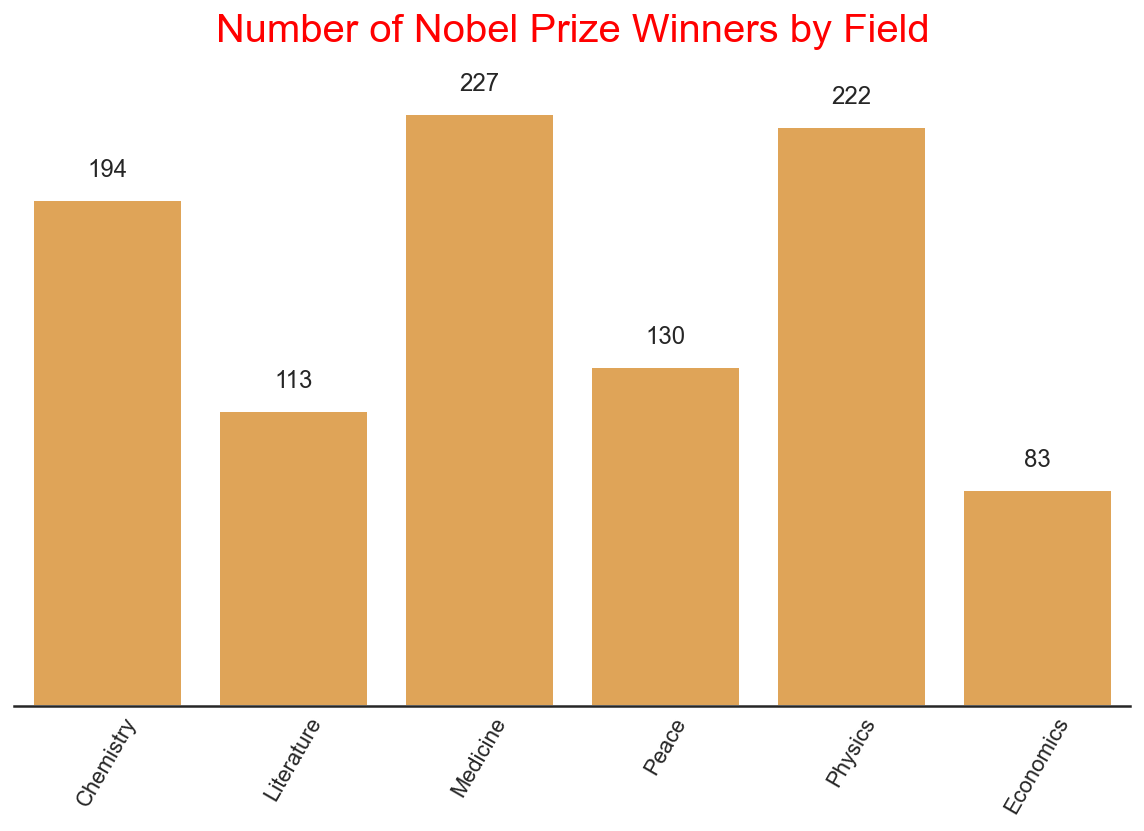

In [26]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
# Call the main function
countplot()
# Change the font for x
ax.set_xlabel('Category', fontsize=20, color='g');
# Change the font for y
ax.set_ylabel('Number of prize winners', fontsize=20, color='g');
# Set a title
ax.set_title('Number of Nobel Prize Winners by Field', fontsize=20, color='r');
# Empty axis labels
ax.set(xlabel='', ylabel='');
# Set a title
ax.set_title('Number of Nobel Prize Winners by Field', fontsize=20);
#plt.show()

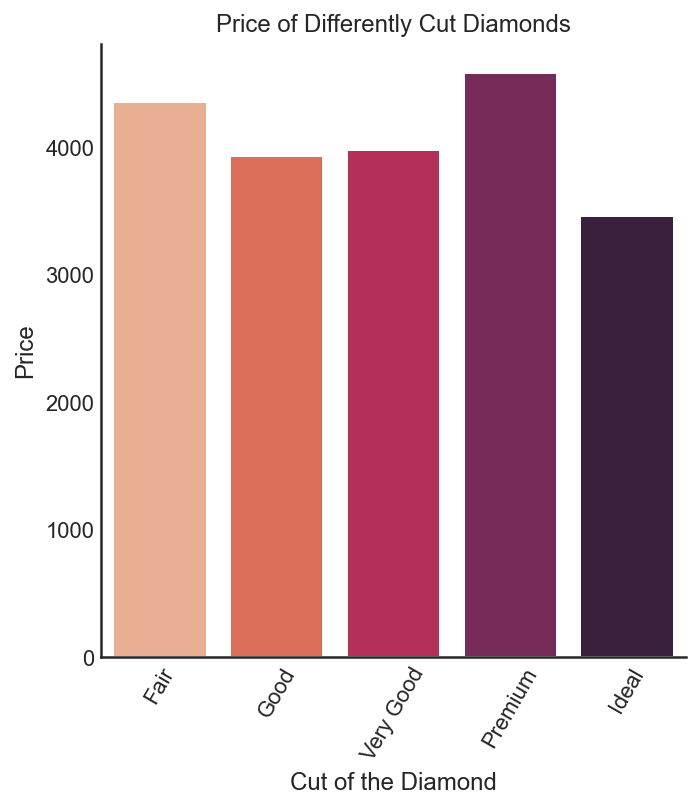

In [28]:
# Use preloaded dataset
diamonds = sns.load_dataset('diamonds');
# Define the order of qualities
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'];
# Plot a bar chart
sns.catplot(x='cut',
            y='price',
            data=diamonds,
            kind='bar',
            ci=False,
            palette='rocket_r',
            order=cut_order);
# Some styling
plt.xticks(rotation=60);
plt.xlabel('Cut of the Diamond');
plt.ylabel('Price');
plt.title('Price of Differently Cut Diamonds');

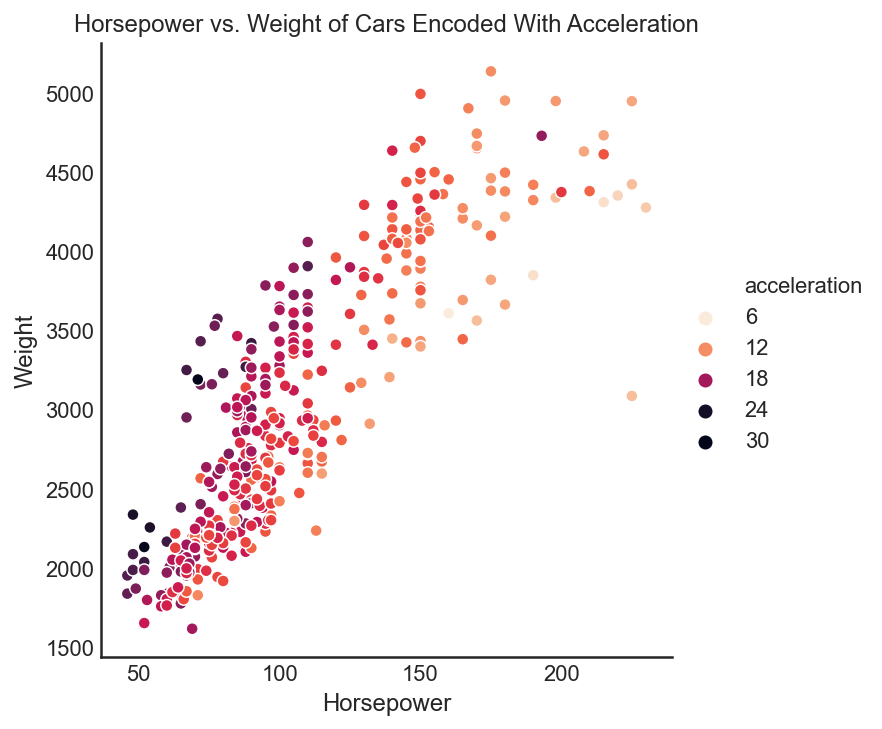

In [30]:
cars = sns.load_dataset('mpg');
sns.relplot(x='horsepower',
            y='weight',
            data=cars,
            hue='acceleration',
            palette='rocket_r');
plt.xlabel('Horsepower');
plt.ylabel('Weight');
plt.title('Horsepower vs. Weight of Cars Encoded With Acceleration');

Text(0.5, 1.0, 'deep')

Text(0.5, 1.0, 'deep6')

Text(0.5, 1.0, 'muted')

Text(0.5, 1.0, 'muted6')

Text(0.5, 1.0, 'pastel')

Text(0.5, 1.0, 'pastel6')

Text(0.5, 1.0, 'bright')

Text(0.5, 1.0, 'bright6')

Text(0.5, 1.0, 'dark')

Text(0.5, 1.0, 'dark6')

Text(0.5, 1.0, 'colorblind')

Text(0.5, 1.0, 'colorblind6')

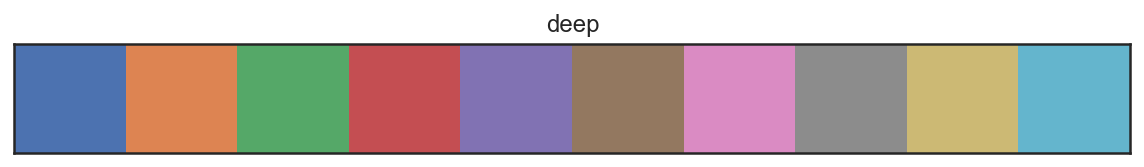

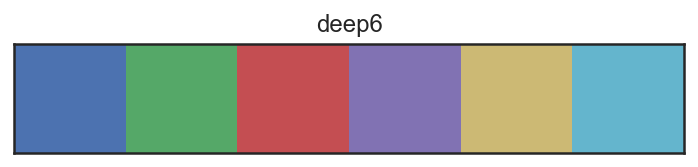

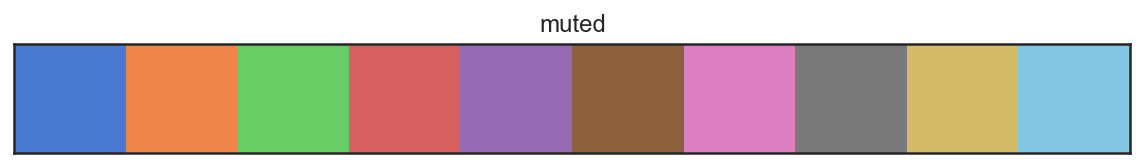

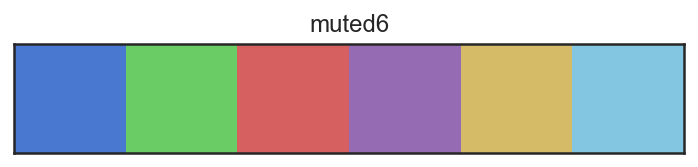

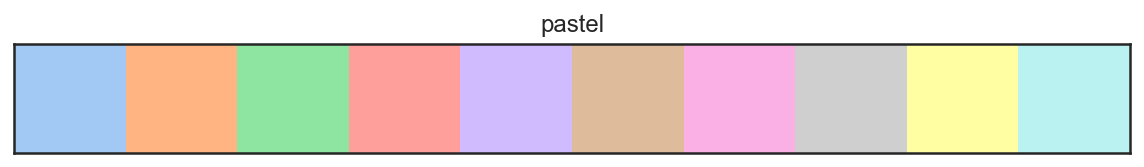

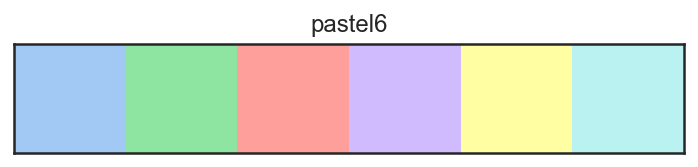

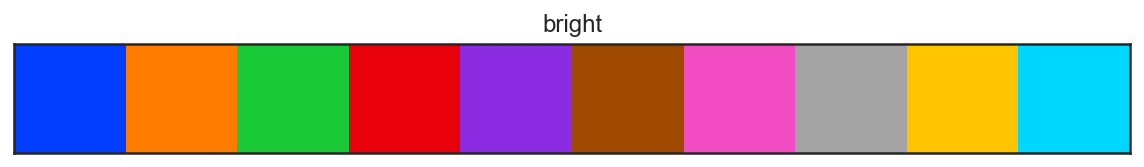

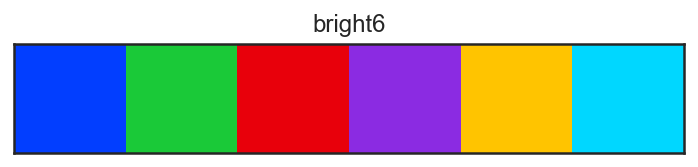

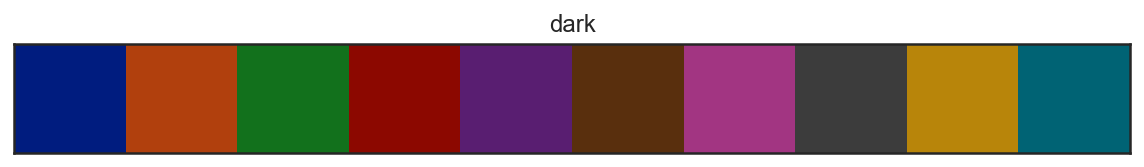

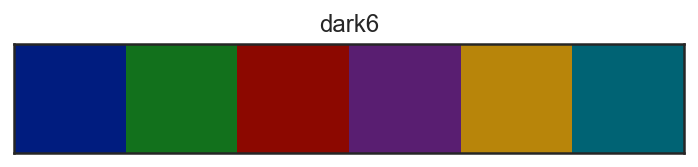

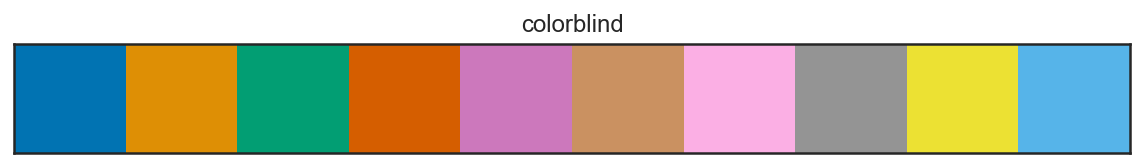

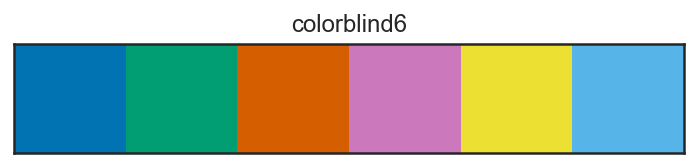

In [34]:
for key, palette in sns.palettes.SEABORN_PALETTES.items():
    sns.set_palette(palette);
    sns.palplot(sns.color_palette());
    plt.title(key);

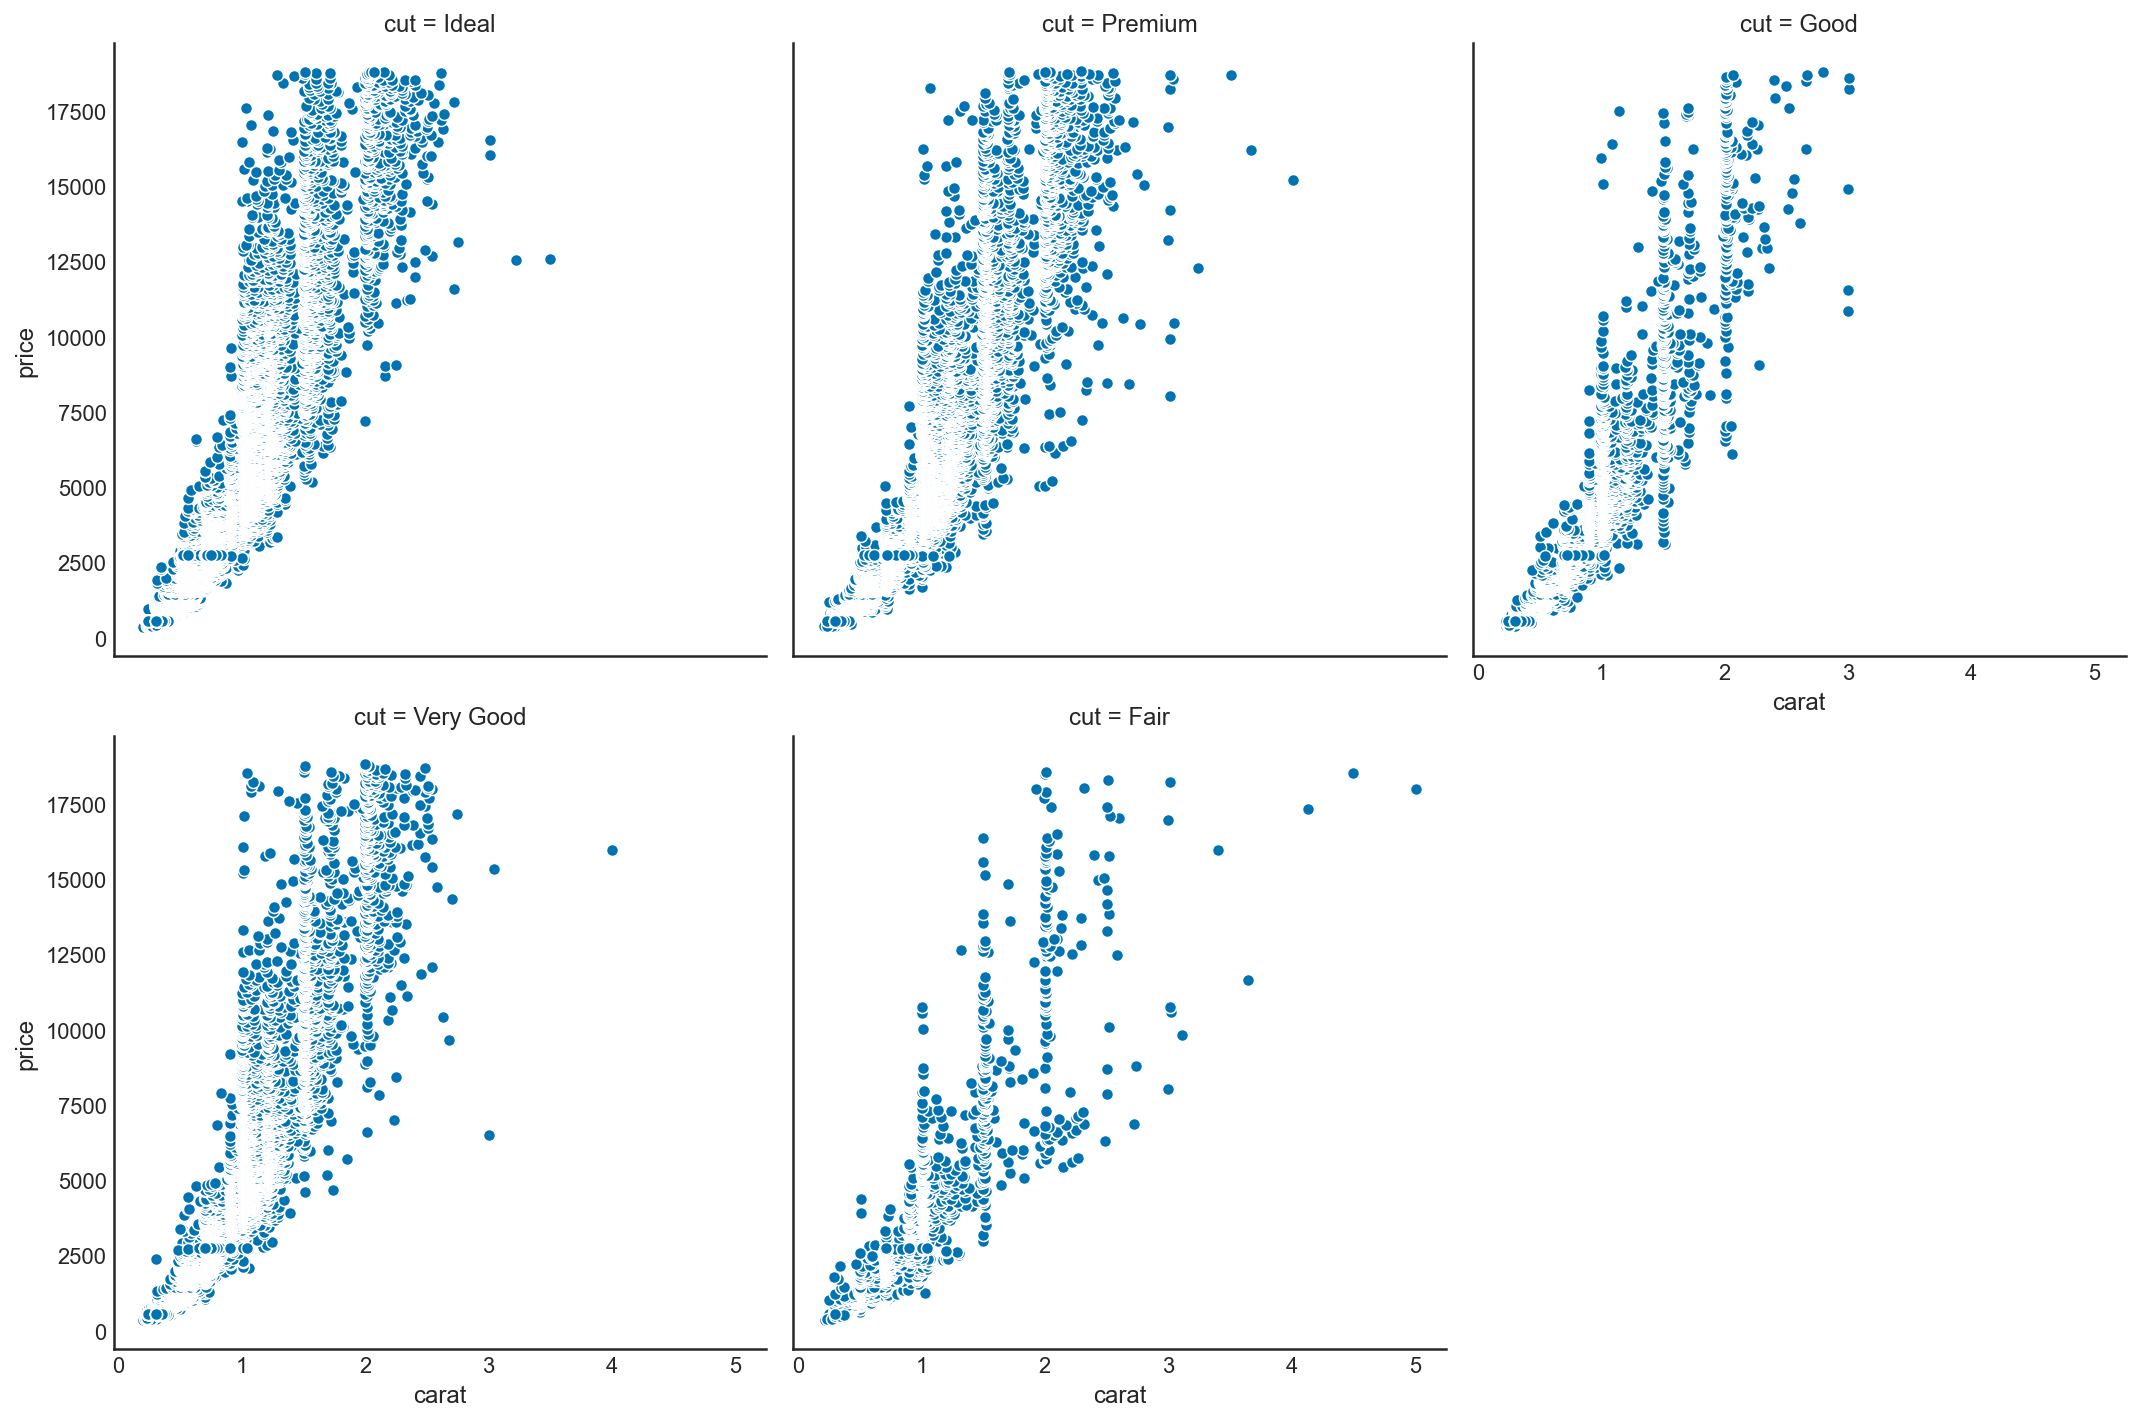

In [36]:
sns.relplot(x='carat', y='price', 
            data=diamonds, col='cut', col_wrap=3);

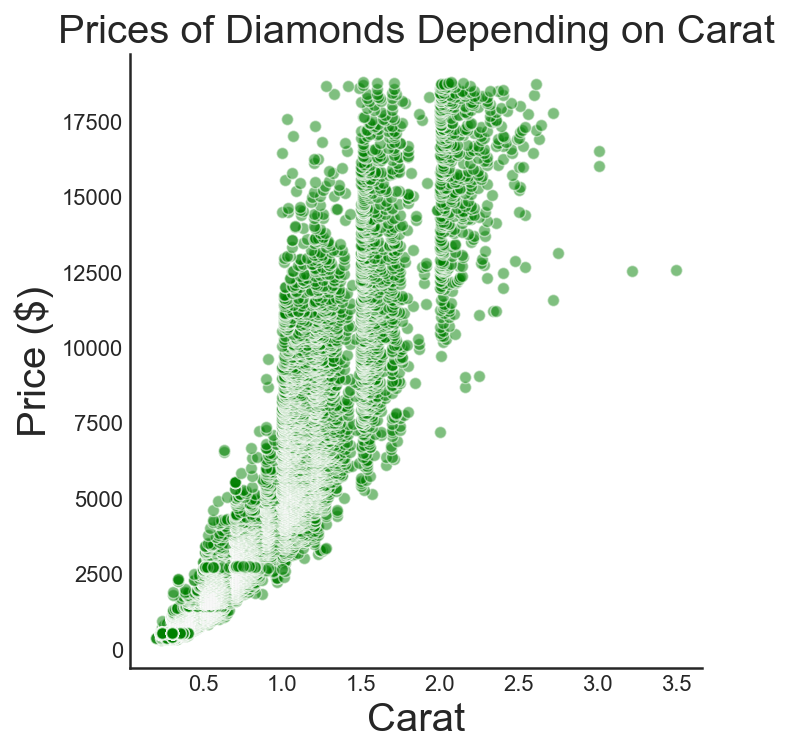

In [37]:
# Extract ideal diamonds
ideal = diamonds.query('cut == "Ideal"');
# Plot the data
sns.relplot(x='carat',
            y='price',
            data=ideal,
            kind='scatter',
            alpha=0.5,
            color='g');
plt.title('Prices of Diamonds Depending on Carat', fontsize=20);
plt.xlabel('Carat', fontsize=20);
plt.ylabel('Price ($)', fontsize=20);